In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_excel('Data_Train.xlsx')

In [4]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
data=train_data.copy()

In [11]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
def change_into_DateTime(col):
    data[col]=pd.to_datetime(data[col])

In [14]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [15]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [16]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_DateTime(feature)
    

In [17]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
data["Journey_date"]=data['Date_of_Journey'].dt.day

In [19]:
data["Journey_month"]=data['Date_of_Journey'].dt.month

In [20]:
data["Journey_year"]=data['Date_of_Journey'].dt.year

In [21]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-02 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-02 05:50:00,2025-11-02 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-02 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [22]:
data['Journey_date'].dtype

dtype('int32')

In [23]:
def extract_hour_min(df, col):
    df[col+"_hour"]=df[col].dt.hour
    df[col+"_minute"]=df[col].dt.minute
    return df.head(3)

In [24]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-02 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-02 05:50:00,2025-11-02 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-02 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25


In [25]:
extract_hour_min(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-11-02 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-11-02 05:50:00,2025-11-02 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-11-02 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [26]:
cols_to_drop=['Dep_Time', 'Arrival_Time']

In [27]:
data.drop(cols_to_drop, axis=1, inplace=True)

In [28]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [29]:
def flight_dep_time(x):
    if x>4 and x<=8:
        return "Early Morning"
    elif x>8 and x<=12:
        return "Morning"
    elif x>12 and x<=16:
        return "Noon"
    elif x>16 and x<=20:
        return "Evening"
    elif x>20 and x<=24:
        return "Night" 
    else:
        return "Late Night"
    

<Axes: xlabel='Dep_Time_hour'>

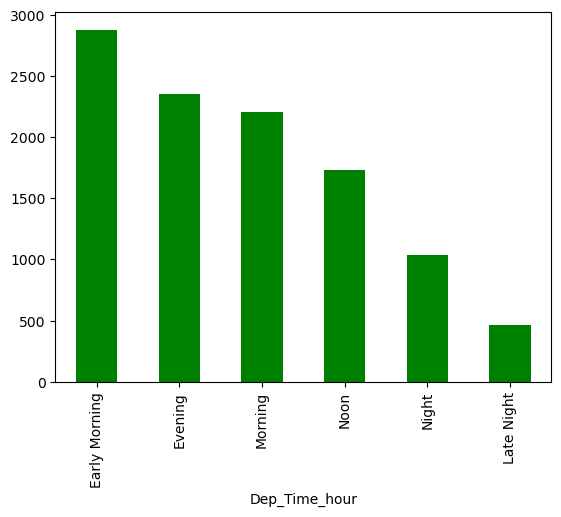

In [30]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar", color="g")

In [31]:
!pip install plotly
!pip install chart_studio
!pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [32]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [33]:
import plotly.express as px

In [34]:
flight_counts = data['Dep_Time_hour'].apply(flight_dep_time).value_counts()
fig = px.bar(
    x=flight_counts.index,
    y=flight_counts.values,
    labels={'x': 'Departure Hour', 'y': 'Count'},
    title='Flight Departure Time Distribution',
    color_discrete_sequence=['orange']
)
fig.show()

In [35]:
def preprocess_duration(x):
    if 'h' not in x:
        x= '0h'+' '+x
    elif 'm' not in x:
        x=x+' '+'0m'
    return x
     

In [36]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [37]:
data['Duration'][0]
    
    

'2h 50m'

In [38]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [39]:
data['Duration'][0]

'2h 50m'

In [40]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [41]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [42]:
data['Duration_min']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [43]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0


In [44]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [45]:
data['Duration_Total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ',"+").str.replace('m',"*1").apply(eval)

In [46]:
data['Duration_Total_mins']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_Total_mins, Length: 10682, dtype: int64

In [47]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_date',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_min', 'Duration_Total_mins'],
      dtype='object')

<Axes: xlabel='Duration_Total_mins', ylabel='Price'>

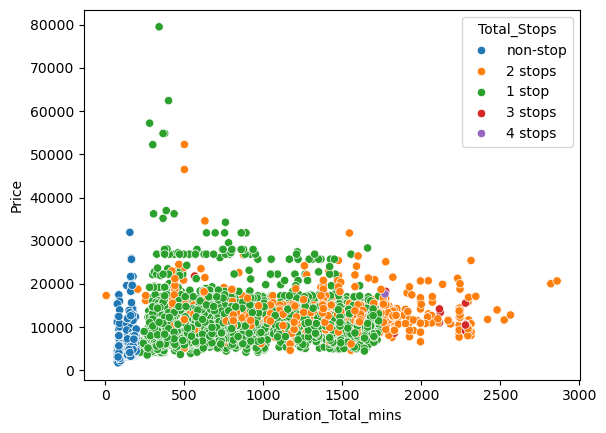

In [48]:
sns.scatterplot(x='Duration_Total_mins', y='Price', hue='Total_Stops',data=data)

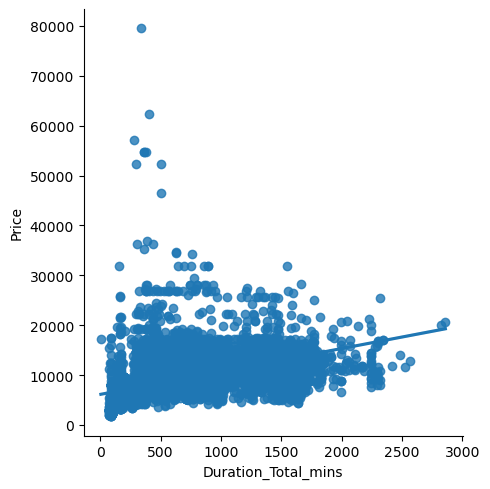

In [49]:
sns.lmplot(x='Duration_Total_mins', y='Price',data=data)

On which route Jet Airways is extremely used?

In [50]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
DEL → JAI → BOM → COK    207
BOM → HYD                207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → IDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
BOM → DED → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
dtype: int64

Airline vs Price Analysis

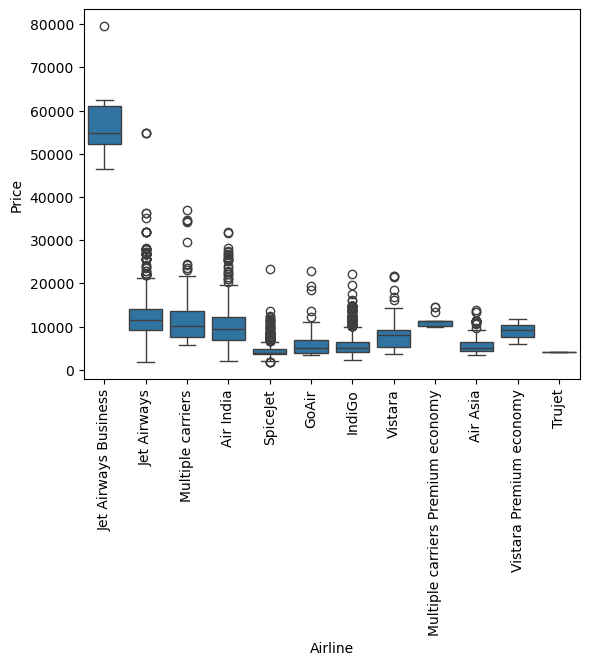

In [51]:
sns.boxplot(y='Price', x='Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation='vertical')
plt.show()

Feature Engineering(One Hot Encoder)

In [52]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Duration_Total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140


In [53]:
data['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [54]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_date',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_min', 'Duration_Total_mins'],
      dtype='object')

In [55]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [56]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [57]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
data['Source'].apply(lambda x : 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [59]:
for sub_category in data['Source'].unique():
    data['Source_'+ sub_category]=data['Source'].apply(lambda x: 1 if x == sub_category else 0)

In [60]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [61]:
data['Airline'].nunique()

12

In [62]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [63]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
type(airlines)

pandas.core.indexes.base.Index

In [65]:
dict_airlines={key:index for index,key in enumerate(airlines,0)}

In [66]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [67]:
data['Airline']=data['Airline'].map(dict_airlines)

In [68]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [69]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
data['Destination'].replace('New Delhi', 'Delhi', inplace=True)

In [71]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [72]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [74]:
dict_dest={key:index for index, key in enumerate(dest, 0)}

In [75]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [76]:
data['Destination']=data['Destination'].map(dict_dest)

In [77]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


Perform Manual Encoding on Data

In [78]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [79]:
data['Total_Stops'].unique()  # as ordinal data--> label encoding

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [80]:
stop={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [81]:
data['Total_Stops']=data['Total_Stops'].map(stop)

In [82]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Duration_Total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,7,25,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,9,25,19,0,1140,0,0,1,0,0


In [83]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [84]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_date',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_min', 'Duration_Total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [85]:
data.drop(columns=['Date_of_Journey','Additional_Info', 'Duration_Total_mins','Source', 'Journey_year'], axis=1, inplace=True )

In [86]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_date', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_min', 'Source_Banglore', 'Source_Kolkata',
       'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [87]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,23,30,18,5,5,25,0,1,0,0,0


In [88]:
data.drop(columns=['Route'], axis=1, inplace=True)

In [89]:
data.head(4)

,Airline,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,5h 25m,1,6218,12,5,23,30,18,5,5,25,0,1,0,0,0


In [90]:
data.drop(columns=['Duration'], axis=1, inplace=True)

In [91]:
data.head(4)

,Airline,Destination,Total_Stops,Price,Journey_date,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,13882,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,6218,12,5,23,30,18,5,5,25,0,1,0,0,0


Outlier Detection

In [92]:
def plot(df, col):
    fig , (ax1, ax2, ax3)=plt.subplots(3,1,figsize=(10, 10))
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(x=df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

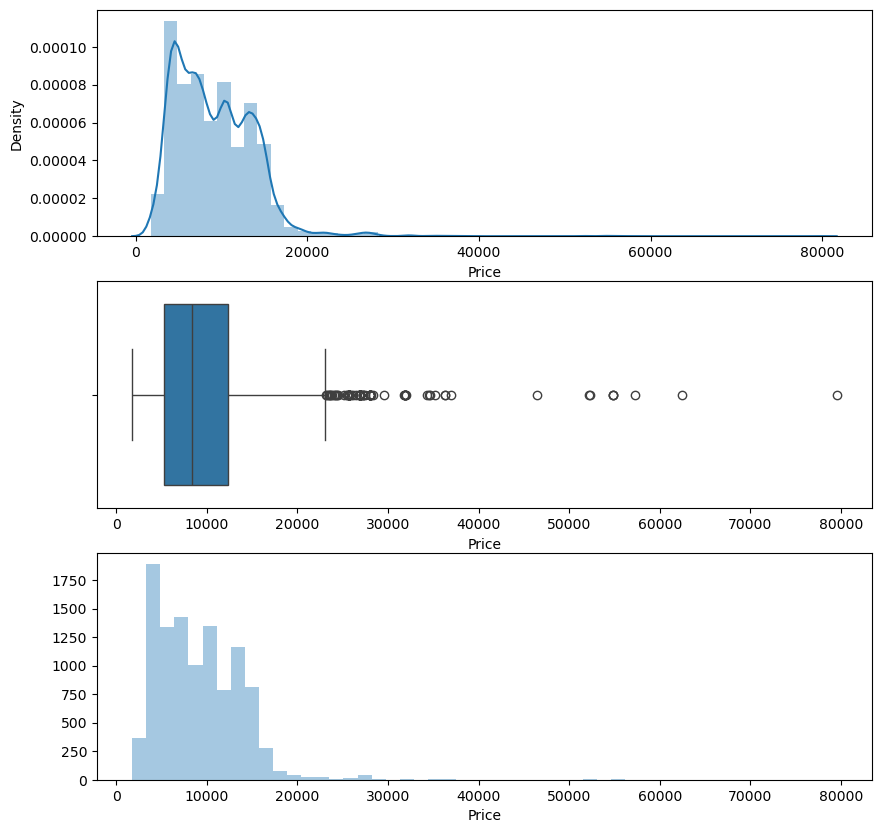

In [93]:
plot(data, 'Price')

Replace Outlier with Median

In [94]:
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)


iqr=q3-q1
maximum=q3+1.5*iqr
minimum=q1-1.5*iqr

In [95]:
maximum

np.float64(23017.0)

In [96]:
minimum

np.float64(-5367.0)

In [97]:
print([price for price in data['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


Replace all the price value greater than 35000 with median

In [98]:
data['Price']= np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

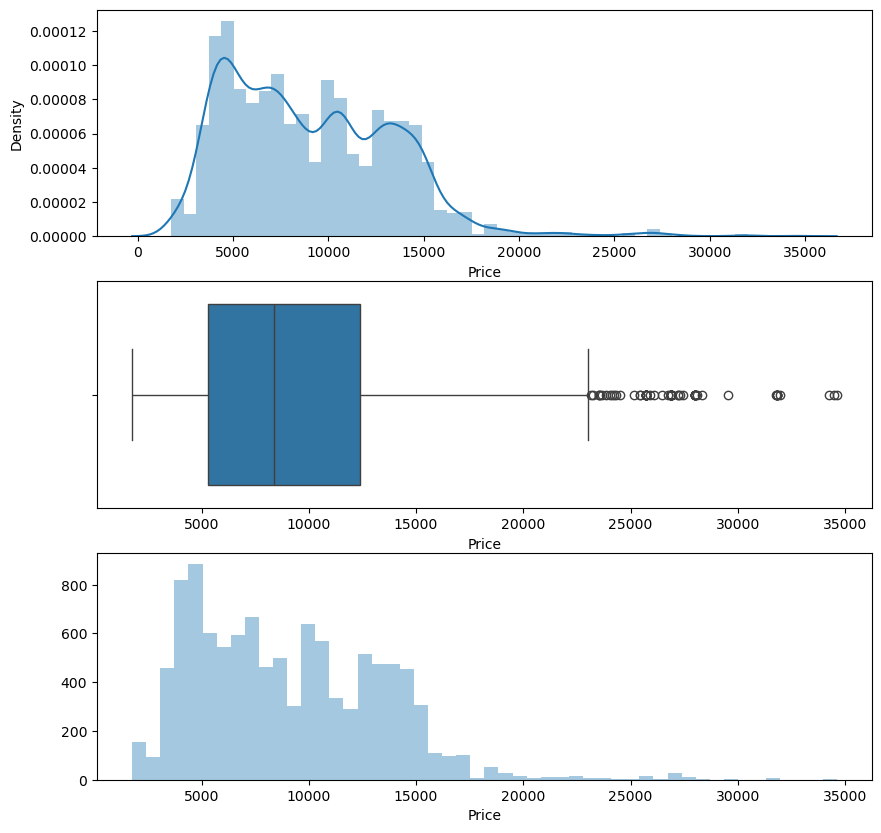

In [99]:
plot(data, 'Price')

Feature Selection

In [100]:
X=data.drop(['Price'], axis=1)

In [101]:
X

,Airline,Destination,Total_Stops,Journey_date,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,1,5,13,15,5,50,7,25,0,1,0,0,0
2,10,4,2,9,6,4,25,9,25,19,0,0,0,1,0,0
3,3,3,1,12,5,23,30,18,5,5,25,0,1,0,0,0
4,3,2,1,1,3,21,35,16,50,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,9,4,22,25,19,55,2,30,0,1,0,0,0
10679,7,3,0,27,4,23,20,20,45,2,35,0,1,0,0,0
10680,10,2,0,27,4,11,20,8,20,3,0,1,0,0,0,0
10681,5,2,0,1,3,14,10,11,30,2,40,1,0,0,0,0


In [102]:
y=data['Price']

In [103]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [104]:
from sklearn.feature_selection import mutual_info_regression

In [105]:
imp= mutual_info_regression(X,y)

In [106]:
imp

array([1.32662766, 1.07195229, 0.79338017, 0.37403034, 0.63151774,
       1.14514498, 0.91062925, 0.92493368, 0.76654682, 1.11475545,
       0.68412767, 0.38542677, 0.45230151, 0.51498901, 0.13623071,
       0.2057222 ])

In [107]:
imp_df=pd.DataFrame(imp, index=X.columns)

In [108]:
imp_df.columns=['importance']

In [109]:
imp_df

,importance
Airline,1.326628
Destination,1.071952
Total_Stops,0.793380
Journey_date,0.374030
Journey_month,0.631518
Arrival_Time_hour,1.145145
Arrival_Time_minute,0.910629
Dep_Time_hour,0.924934
Dep_Time_minute,0.766547
Duration_hours,1.114755


In [110]:
imp_df.sort_values(by='importance', ascending=False)

,importance
Airline,1.326628
Arrival_Time_hour,1.145145
Duration_hours,1.114755
Destination,1.071952
Dep_Time_hour,0.924934
Arrival_Time_minute,0.910629
Total_Stops,0.793380
Dep_Time_minute,0.766547
Duration_min,0.684128
Journey_month,0.631518


In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
ml_model= RandomForestRegressor()

In [115]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [116]:
y_pred=ml_model.predict(X_test)

In [117]:
y_pred

array([16772.58,  5339.1 ,  8777.02, ...,  3545.18,  6175.93,  6915.29])

In [118]:
from sklearn import metrics

In [119]:
metrics.r2_score(y_test, y_pred)

0.8112346843237466

In [120]:
import pickle

In [121]:
file=open('rf_random.pkl','wb')

In [122]:
pickle.dump(ml_model, file)

In [123]:
model=open('rf_random.pkl','rb')

In [124]:
forest=pickle.load(model)

In [125]:
y_pred2= forest.predict(X_test)

In [126]:
y_pred2

array([16772.58,  5339.1 ,  8777.02, ...,  3545.18,  6175.93,  6915.29])

In [127]:
metrics.r2_score(y_test, y_pred)

0.8112346843237466

Automation Pipeline

In [128]:
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100  #MAPE(Mean Absolute percentage Error)

In [129]:
mape(y_test, y_pred)

np.float64(13.256443713957378)

In [130]:
from sklearn import metrics

In [131]:
def predict(ml_model):
    model=ml_model.fit(X_train, y_train)
    print('Training Score:{}'.format(model.score(X_train, y_train)))
    y_predection=model.predict(X_test)
    print('prediction are:{}'.format(y_predection))
    print('\n')
    r2_score=metrics.r2_score(y_test, y_predection)
    print('r2_score: {}'.format(r2_score))
    print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_predection)))
    print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_predection)))
    print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predection))))
    print('MAPE: {}'.format(mape(y_test, y_predection)))
    sns.displot(y_test - y_predection)
    

Training Score:0.9515267735013427
prediction are:[16887.53  5210.84  8824.39 ...  3506.09  6178.65  6876.55]


r2_score: 0.8127454478705345
MAE: 1171.8453792145392
MSE: 3645396.656385854
RMSE: 1909.2921872740835
MAPE: 13.110348806996225


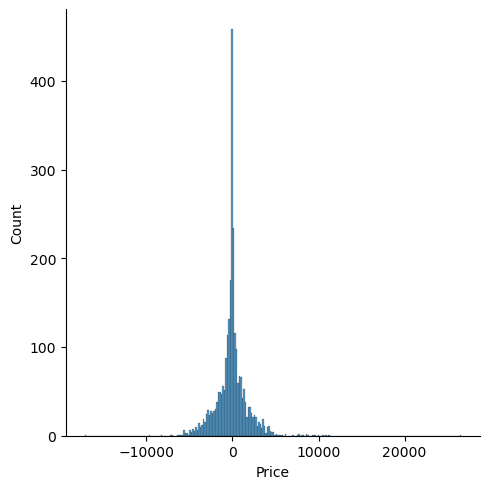

In [132]:
predict(RandomForestRegressor())

In [133]:
from sklearn.tree import DecisionTreeRegressor 

Training Score:0.966591628243878
prediction are:[16840.  4959.  8610. ...  3419.  5797.  6442.]


r2_score: 0.6783367431960327
MAE: 1400.568239111444
MSE: 6262011.510538084
RMSE: 2502.4011490043085
MAPE: 15.443753944274649


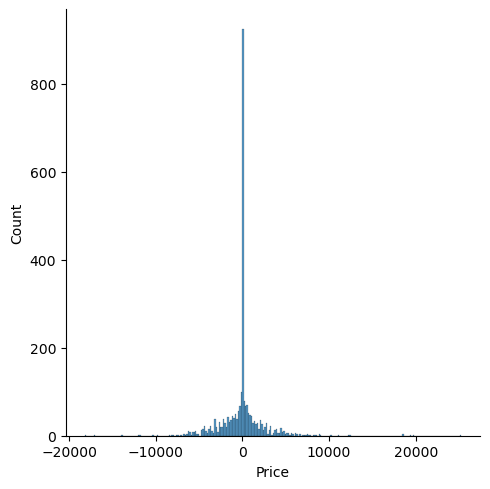

In [134]:
predict(DecisionTreeRegressor())

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
reg_rf=RandomForestRegressor()

In [139]:
np.linspace(start=100, stop=1200, num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [149]:
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=6)]
max_features=['auto', "sqrt"]
max_depth=[int(x) for x in np.linspace(start=5, stop=30, num=4)]
min_samples_split=[5,10,15,100]

In [150]:
random_grid={'n_estimators': n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split}

In [151]:
rf_random=RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, cv=3, n_jobs=-1, verbose=2)

In [152]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [153]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 13}

In [154]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', min_samples_split=5,
                      n_estimators=1200)

In [155]:
rf_random.best_score_

np.float64(0.8038382332820558)